# Time-Series Manipulation and Visualization for Weather data

#### Time-series are ubiquitous, and analyzing various time-series around us can provide us abundant information. Let's learn how to manipulate and visualize a weather related time-series and deduce information from it.

<img src='LifeasaTimeSeries.png'>

Post your doubt/feedback/discussion in our FB group unit <a href='https://www.facebook.com/groups/colearninglounge/'>here</a> in the appropriate section.

## Table of Contents:
<ul>
    <li>Introduction</li>
    <li>Import the libraries</li>
    <li>Load the dataset</li>
    <li>Pre-processing the data</li>
    <ul>
        <li> Converting strings to timestamps</li>
        <li> Dealing with NaNs in the dataset</li>
        <li> Resampling the time-series</li>
        <li> Combining the time-series</li>
    </ul>
    <li>Visualizing the time-series</li>
    <li>Augmented Dickey Fuller Test to test stationarity of time-series</li>
    <li>Auto Co-relation and Partial auto co-relation plot</li>
    <li>Summary</li>
    <li>Credits</li>
    
</ul>

### Introduction

In this tutorial, we will learn how to analyze and pre-process a time-series dataset, before one can apply any statistical or machine learning modelling on it. We will start by downloading a time-series dataset. Then we will pre-process it to make sure that time series is continuous, equispaced and consistent. Then we will go on to visualize the data. Finally, we will learn the significance of stationarity of time series data, auto correlation and partial auto correlation plot.

### Import the libraries
Python provides a variety of libraries to ease out the computational challenges of coding and handle time-series data rather easily. Here we import the essential libraries for time-series analysis and visualization.
<ul>
    <li> <b> Pandas </b> : This library provides data structures and oprations for manipulating numerical tables and time series. </li>
    <li> <b> Datetime </b> : This library has classes for manipulating dates and times in both simple and complex ways. </li>
    <li> <b> Matplotlib </b> : It provides data visualization functionality. </li>
     <li> <b> Statsmodels </b> : It provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. </li>

In [59]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

### Load the Dataset

For this tutorial we will be using Minimum Temperatures in Melbourne Data Set, which you can download from <a href="https://www.kaggle.com/paulbrabban/daily-minimum-temperatures-in-melbourne#daily-minimum-temperatures-in-me.csv"> here</a>. This is a univariate dataset containing minimum temperature in Melbourne for every day from 1st January, 1981 to 31st December, 1990.

There are multiple ways of reading a file in a python program, reading a file as a dataframe using `Pandas` package is the most convenient one. First and foremost, on downloading the file, we need to see the whether or not header & footer is present and the delimiter being used and specify that while reading the file.

Since here we are working with time series, we need to set date parser to True. We can make 'Date' column of the dataset as the index column, but we will be setting index further in the tutorial.

You may use some other dataset, which may need some other specifications to be read properly into a dataframe, you can find the apt attributes for read_csv function <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html"> here</a>.

**Note**: The downloaded file contains some question mark `?` characters that must be removed before you can use the dataset. 

In [39]:
df = pd.read_csv('daily-minimum-temperatures-in-me.csv', delimiter = ',', header=0, skipfooter=2, parse_dates=True, engine='python')

We can see the first five entries or last five entries to make sure your dataframe has been read properly, using the following two commands:

In [40]:
print (df.head())
print (df.tail())
print ('\n DataType of Index Column: ',type(df.index[1]))

         Date  Daily minimum temperatures in Melbourne, Australia, 1981-1990  \
0  1981-01-01                                               20.7               
1  1981-01-02                                               17.9               
2  1981-01-03                                               18.8               
3  1981-01-04                                               14.6               
4  1981-01-05                                               15.8               

   Unnamed: 2  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
            Date  \
3645  1990-12-27   
3646  1990-12-28   
3647  1990-12-29   
3648  1990-12-30   
3649  1990-12-31   

      Daily minimum temperatures in Melbourne, Australia, 1981-1990  \
3645                                               14.0               
3646                                               13.6               
3647                                               13.5               
3648              

### Pre-processing the data
#### Converting Strings to TimeStamps
Once, our file is read properly, it becomes fairly easy to perform certain tasks to make the data programmer friendly such as:
<ul>
    <li>Renaming the column name(s):
        We can replace the long column name given with a shorter one.
    </li>

In [41]:
df = df.rename(columns={'Daily minimum temperatures in Melbourne, Australia, 1981-1990':'min_temp'})

<ul>
    <li>Setting Index Column:<br>
        We can either set the index column while reading the file as date so date column can be accessed only as an index and the datatype of values in index column is <i>Timestamp</i>.<br>
        Alternatively, we can set the index after reading the file using the command given below in which case Date becomes index as well as a column of dataframe. Here the datatype of values in Date column as well the index column is <i>string</i>.
    </li>

In [42]:
df.index = df.Date
print (df.head())
print ('\n DataType of Index & Date : ' ,type(df.index[1]), type(df.Date[1]))

                  Date  min_temp  Unnamed: 2
Date                                        
1981-01-01  1981-01-01      20.7         NaN
1981-01-02  1981-01-02      17.9         NaN
1981-01-03  1981-01-03      18.8         NaN
1981-01-04  1981-01-04      14.6         NaN
1981-01-05  1981-01-05      15.8         NaN

 DataType of Index & Date :  <class 'str'> <class 'str'>


Interesting, right?

Here we need the <b>Date</b> to be a timestamp to be able to manipulate it with ease.
For this, we will be using the `datetime` library. This package comes handy while dealing with timeseries for manipulating and formatting time. You can read and practice all that datetime package allows you to do <a href='https://docs.python.org/3/library/datetime.html'> here</a>.
To change the datatypes of all the strings of the Index column and Date column, we will be using `map` function for index column and `lambda` function for other columns.

In [43]:
df.index = df.index.map(lambda x: datetime.datetime.strptime((x),'%Y-%m-%d'))
print ('\n New DataType of Index Column: ' , type(df.index[1]))


 New DataType of Index Column:  <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [44]:
df.Date = df.Date.apply(lambda x: datetime.datetime.strptime((x),'%Y-%m-%d'))
print ('\n New DataType of Date Column: ' , type(df.Date[1]))


 New DataType of Date Column:  <class 'pandas._libs.tslibs.timestamps.Timestamp'>


This converts strings to Timestamps.
#### Dealing with NaNs in the dataset
The real world data is not perfect, it may have missing values, it may have observations at an inconsistent frequency, hence, before we can go on to model it, we need to shape it in the best possible form.

In any data there are several ways of dealing with the missing data or NaN(s):
<ul>
    <li> Dropping NaN(s):<br>
       When the missing values are very less, and they don't really affect our data as a whole, then you can simply drop all the NaN values. </li>
</ul>

In [45]:
df.min_temp = df.min_temp.dropna()

Similarly, if in a dataframe there are a lot of repeated records which we don't want, we can drop that in  similar fashion.
<ul>
    <li> Replace NaN(s) with 0:<br>
    When the missing values can't be dropped, specially in a time series because we need to maintain continuous timestamps, we can replace timestamps with 0.</li>
</ul>

In [46]:
df.min_temp = df.min_temp.fillna(0)

<ul>
    <li> Estimating the Missing Values:<br>
    When the missing values were significant for any reaason, we can estimate their values by the preceding values, succeeding values or mean of the entire column.
    </li>
</ul>

In [47]:
df.min_temp = df.min_temp.fillna(method='ffill')
df.min_temp = df.min_temp.fillna(df.mean())

#### Resampling a Time Series
In a scenario where data is recorded at a frequency which is too high or too low to be able to model it, you can resample it.

A time series can be resampled in the following two ways:
<ul>
    <li>Downsample the time series and summarize the existing observations.</li>
    <li>Upsample the time series and interpolate the new observations.</li>
</ul>

This dataset is sampled at each day, let's say we want to resample it in such a way that it gives you the minimum value for one month i.e. we wish to downsample it from days to months.

In [48]:
df_down = df.resample('1M').min()
print (df_down.head())
print ('\n Length of the downsampled series: ', len(df_down))

                 Date  min_temp  Unnamed: 2
Date                                       
1981-01-31 1981-01-01      12.1         NaN
1981-02-28 1981-02-01      13.7         NaN
1981-03-31 1981-03-01       8.0         NaN
1981-04-30 1981-04-01       7.4         NaN
1981-05-31 1981-05-01       2.1         NaN

 Length of the downsampled series:  120


Now, we have one value for one month now.
Likewise, we can resample it at a different interval and get the maximum or mean of the values for a month.

Cool, Right?

Now, time for the trickier one, upsampling the data.
Let's say now from the dataset, we want to interpolate the minimum temperatures for daytime and nighttime. We can accomplish so by upsampling it at 12 hours. 

In [49]:
df_up = df.resample('12H').ffill()
print (df_up.head())
print ('\n Length of the upsampled series: ', len(df_up))

                          Date  min_temp  Unnamed: 2
Date                                                
1981-01-01 00:00:00 1981-01-01      20.7         NaN
1981-01-01 12:00:00 1981-01-01      20.7         NaN
1981-01-02 00:00:00 1981-01-02      17.9         NaN
1981-01-02 12:00:00 1981-01-02      17.9         NaN
1981-01-03 00:00:00 1981-01-03      18.8         NaN

 Length of the upsampled series:  7303


#### Combining Time Series
According to your problem statement, at times, we may need to combine two or more time series because data in one time series doesn't fully capture all the information we need to model the data. We can either combine time series end to end, hence, increasing the total number of observations or we can combine time series such that you add more dependent variables for the existing timestamps. 

There are three ways to combine two or more time series: 
<ul>
    <li>Concatenate:<br>
        When the time series need to be joined end to end, we concatenate them and if they aren't in order, we can sort their index.
    </li>
</ul>
You can download the dataset containing the minimum temperatures for all the days of the year 1991 <a href="https://github.com/navekshasood/Temperature-data">here</a>.

In [50]:
df_test = pd.read_csv('daily-minimum-temperatures-in-me-test.csv', delimiter = ',', header=0, skipfooter=2, parse_dates=True, engine='python')

Since there is no header in this file, you will create the header.

In [51]:
df_test.columns = ["Date", "min_temp"]
df_test.index = df_test.Date
print (df_test.head())

                  Date  min_temp
Date                            
1991-01-02  1991-01-02      16.2
1991-01-03  1991-01-03      16.1
1991-01-04  1991-01-04      15.7
1991-01-05  1991-01-05      19.5
1991-01-06  1991-01-06      17.4


Now let's combine the two datasets end to end.

In [52]:
frames = [df,df_test]
print ('Length of 1st dataframe: ',len(df),'\nLength of 2nd dataframe: ',len(df_test))
df_full = pd.concat(frames)
print ('Length of concatenated dataframe: ',len(df_full))

Length of 1st dataframe:  3650 
Length of 2nd dataframe:  362
Length of concatenated dataframe:  4012


/home/naveksha/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


<ul>
    <li>Merge:<br>
    When two dataframes with similar values of the index needs to be joined, we will merge them.
    </li>
</ul>
    You can download the dataset containg maximum temperatures in Melbourne <a href="https://github.com/navekshasood/Data"> here</a>. It contains maximum temperatures for 1981 to 1991 for each day.

In [53]:
df_max = pd.read_csv('daily-maximum-temperatures-in-me.csv', delimiter = ',', header=0, skipfooter=2, parse_dates=True, index_col='Date', engine='python')

In [54]:
df_temp = pd.merge(df, df_max, how="outer", on=df.index)
print (df_temp.head())

       key_0       Date  min_temp  Unnamed: 2  max_temp
0 1981-01-01 1981-01-01      20.7         NaN      32.7
1 1981-01-02 1981-01-02      17.9         NaN      31.9
2 1981-01-03 1981-01-03      18.8         NaN      29.8
3 1981-01-04 1981-01-04      14.6         NaN      27.6
4 1981-01-05 1981-01-05      15.8         NaN      24.8


<ul>
    <li>Join:<br>
        It performs in the same way as merge.
    </li>
</ul>

In both the cases we can select what kind of join you want to perform, like, outer join, inner join, left join or right join.

In [55]:
df_temp = df.join(df_max, how="outer", on=df.index)
print (df_temp.head())

                key_0       Date  min_temp  Unnamed: 2  max_temp
Date                                                            
1981-01-01 1981-01-01 1981-01-01      20.7         NaN      32.7
1981-01-02 1981-01-02 1981-01-02      17.9         NaN      31.9
1981-01-03 1981-01-03 1981-01-03      18.8         NaN      29.8
1981-01-04 1981-01-04 1981-01-04      14.6         NaN      27.6
1981-01-05 1981-01-05 1981-01-05      15.8         NaN      24.8


### Visualizing the time-series
Once all the pre-processing of the data is done, it is useful to visualize graphs which we will do with the help of a very versatile python library `matplotlib`. It helps to see the trends and growth in the data, and helps us make sense of the data we are working with. It's also useful while comparing values of two variables.

It has huge variety of plots that we can choose from according to our requirement, a few will be discussed in the following section.
<ul>
    <li>Line Plot</li>
</ul>
First you will be plotting a line graph of down sampled data of 10 years.<br>
**Note** : Keep in mind to change the datatype of minimum tempratures to numeric value. 

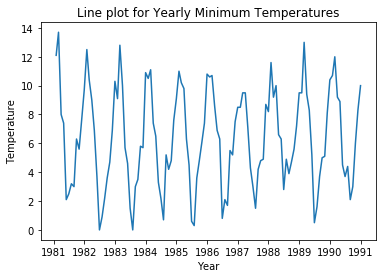

In [56]:
df_down.min_temp = pd.to_numeric(df_down.min_temp)
plt.plot(df_down.min_temp)
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Line plot for Yearly Minimum Temperatures')
plt.show()

<ul>
    <li>Histogram</li>
</ul>

Next we'll be plotting a histogram dividing the temperatures in various ranges and seeing in which range the temperature was most frequent.

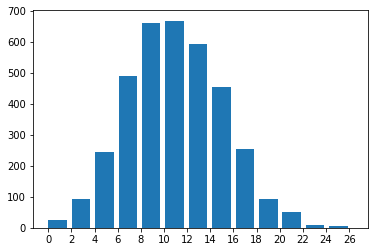

In [57]:
df.min_temp = pd.to_numeric(df.min_temp)
plt.xticks(ticks=[0,2,4,6,8,10,12,14,16,18,20,22,24,26])
plt.hist(df.min_temp, bins=13, width=1.6, align='mid')
plt.show()

### Augmented Dickey Fuller Test to test stationarity of time-series
An augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity. It is an augmented version of the Dickey–Fuller test for a larger and more complicated set of time-series models.

The augmented Dickey–Fuller (ADF) statistic, used in the test, is a negative number. The more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence.

In [60]:
X = df.min_temp
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.423336
p-value: 0.000270
Critical Values:
	10%: -2.567
	5%: -2.862
	1%: -3.432


Here, p-values is less than 0.05 which means the ADF Statistic is significant, and since it is more negative than the critical values, we will reject the null hypothesis, which means there's no unit root, i.e. time-series is stationary.

In case, the time-series turn out to be non-stationary, we can difference the time series and do an ADF test again.


### Auto-correlation & partial auto-correlation plot
Now, moving on to an important aspect of time series which shows the dependence of a variable at a particular time on the times prior to it.
In this section we will learn how to plot auto-correlation and partial-autocorrelation plots, their significance and interpretation.

To do this you will be using a python library `statsmodels`.
Autocorrelation is the relation of a series with itself, an AC plot or correlogram tells us that a variable is dependent on how many previous values, also termed as lags. You can limit the number of lags to a finite value to avoid noise in ACP. 

The values lying outside the light blue shaded region suggest a co-relation. 

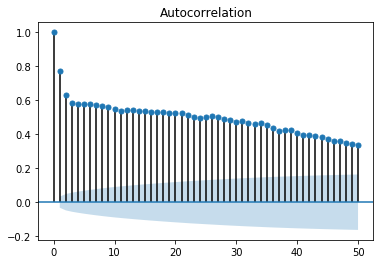

In [111]:
plot_acf(df.min_temp, lags= 50)
plt.show()

Partial Autocorrelation is similar to Autocorrelation, only with the correlations due shorter lags removed.

The autocorrelation of a variable at time 't' and 't-1' is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the value of variable, with values at intervening time steps. It is these indirect correlations that the partial autocorrelation function seeks to remove. 

It is read in the same way as an ACP.

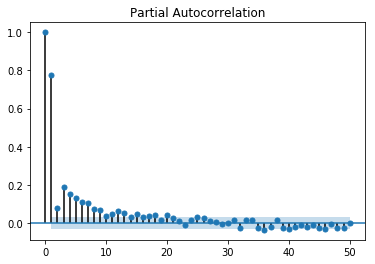

In [107]:
plot_pacf(df.min_temp,lags=50)
plt.show()

These ACP and PACP plots are very useful to determine the parameters for ARIMA model which you will be studying in the coming tutorials.

###  Summary
In this tutorial we learnt all about pre-processing and understanding a time series. Now we are ready to apply any machine learning model on our dataset.
And as they say, well-started is half done. If you're well aware and comfortable with manipulating your dataset, your work is half done and applying ML algorithms will be nothing but fun!

Stay tuned for more tutorials on time series!

> This tutorial is intended to be a public resource. If you see any glaring inaccuracies or a missing critical topic, please feel free to point it out or submit a pull request to improve the tutorial. 
Also, we are always looking to improve the scope of this article. For any suggestions and feedback, mail us @ colearninglounge@gmail.com
### Credits
> This article is authored by: <li>Naveksha Sood : Follow her on <a href='https://www.linkedin.com/in/naveksha-sood-8b6824160/'>LinkedIn</a>, <a href='https://medium.com/@navekshasood'>Medium</a> and <a href='https://github.com/search?q=naveksha+sood'>GitHub</a>.</li>